# Sub-Metric: Crime
### By: Mat
The more safe the neighborhood, the more safe the public parks with the facilities will be. This metric will analyze a crime dataset to determine the safest neighborhood.

In [8]:
import pandas as pd

In [9]:
#importing data
crime = pd.read_csv("public-safety.csv")

#displaying data!
crime.head(5)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7


In [10]:
#adds up total crime for each neighboorhood and puts it into a series (excludes reports)
total_crime = crime["#Murder (2010)"] + crime["#Rape (2010)"] + crime["#Robbery (2010)"] + crime["#Agr. Assault (2010)"] + crime["#Burglary (2010)"] + crime["#Auto Theft (2010)"] + crime["#Drug Violations (2010)"]
print(total_crime)

0      60
1      33
2     165
3      45
4      24
     ... 
85     86
86     46
87     54
88     32
89     26
Length: 90, dtype: int64


In [11]:
#population is a string here, not an int -> need to convert
print(crime["Population (2010)"])

0       933
1       462
2     2,500
3     1,869
4       244
      ...  
85    2,669
86      254
87    2,604
88    3,066
89    1,369
Name: Population (2010), Length: 90, dtype: object


In [12]:
#creates a Series with population in int form (notice no ',' in numbers)
population = crime["Population (2010)"].str.replace(',', '')
population = population.astype(int)
print(population)

0      933
1      462
2     2500
3     1869
4      244
      ... 
85    2669
86     254
87    2604
88    3066
89    1369
Name: Population (2010), Length: 90, dtype: int64


In [13]:
#ratio for determing most dangerous/safe neighboordhood 
cpp = (total_crime / population * 100)

#adds ratio as a column to main dataset
crime["Crime/Population (%)"] = cpp
crime.head(10)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010),Crime/Population (%)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31,6.430868
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12,7.142857
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66,6.600000
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9,2.407705
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7,9.836066
5,Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7,0.675676
6,Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25,4.159734
7,Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29,1.642839
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38,4.727273
9,Bloomfield,12,"8,442",453,371,296,5.4,4.4,0,3,45,20,70,36,42,2.558635


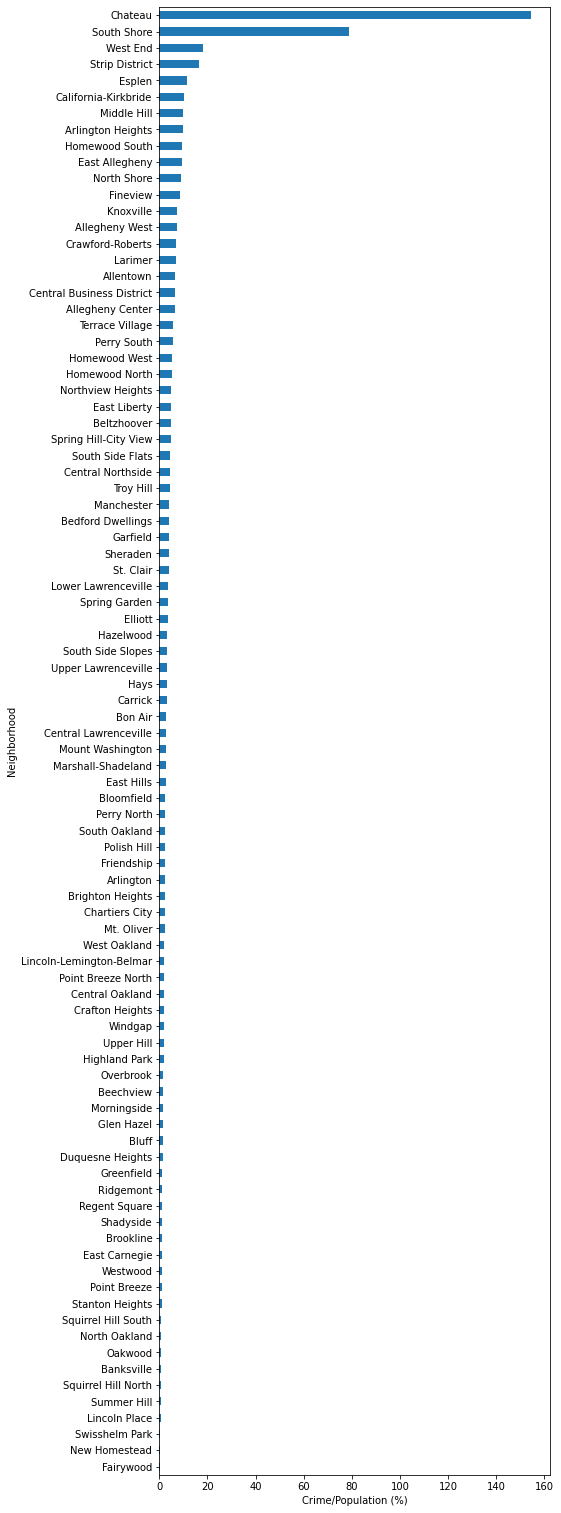

In [14]:
#display table
filterds = crime.filter(["Neighborhood", "Crime/Population (%)"]).sort_values(by=["Crime/Population (%)"], ascending=True)
graph = filterds.plot.barh(x="Neighborhood", y= "Crime/Population (%)", figsize=(7,crime.shape[0] * 0.3), legend=None)
graph.set_xlabel("Crime/Population (%)")
display(graph)

Based on our ratio of Crime/Population, the 5 safest neighborhoods to play sports in would be:
- Fairywood
- New Homestead
- Swisshelm Park
- Lincoln Place
- Summer Hill

In conclusion, the best neighborhood to play sports in based off of crime alone would be **Fairywood**.